In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
%matplotlib inline

## Reading the data from the cleaned Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/NLP_personalityTrait/mbti_cleaned.csv')
data.dropna(inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Posts'],data['type'], random_state=0)
cv = CountVectorizer()
tfidf = TfidfTransformer()

In [ ]:
x_test

2598    foregiveness  given  those  deserve itthis   v...
2557     used  commute every    major eastwest freeway...
2272     would gently prod  more information next time...
2813       truth  because   coward with commitment iss...
653       which country   from      feel like    overw...
                              ...                        
4489       supposedly removed from  forumeven baby   c...
6693    hmmi dont know  hunter gatherer should countto...
6525       understand istjs  cant find   into their mi...
1115    nope     ever    busy with work causes  adrena...
7474     social feeler with good intensions they    lo...
Name: Posts, Length: 1887, dtype: object

In [ ]:
x_train_counts = cv.fit_transform(x_train)
x_train_tfidf = tfidf.fit_transform(x_train_counts)

##  Tuning the Hyperparameter alpha

In [ ]:
alpha = np.arange(0.00001,0.1,0.0001)
alpha = alpha[:50]
accuracy= []
for i in alpha:
    model = MultinomialNB(alpha = i)
    model.fit(x_train_tfidf,y_train)
    y_pred = model.predict(cv.transform(x_test))
    print("alpha is: ",i,"Accuracy is :",metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

alpha is:  1e-05 Accuracy is : 0.2994170641229465
alpha is:  0.00011 Accuracy is : 0.3179650238473768
alpha is:  0.00021 Accuracy is : 0.32273449920508746
alpha is:  0.00031000000000000005 Accuracy is : 0.3275039745627981
alpha is:  0.00041000000000000005 Accuracy is : 0.3322734499205087
alpha is:  0.00051 Accuracy is : 0.3338632750397456
alpha is:  0.0006100000000000001 Accuracy is : 0.3365129835718071
alpha is:  0.00071 Accuracy is : 0.34022257551669316
alpha is:  0.0008100000000000001 Accuracy is : 0.34128245892951775
alpha is:  0.0009100000000000001 Accuracy is : 0.34340222575516693
alpha is:  0.00101 Accuracy is : 0.34340222575516693
alpha is:  0.00111 Accuracy is : 0.34287228404875464
alpha is:  0.0012100000000000001 Accuracy is : 0.34340222575516693
alpha is:  0.0013100000000000002 Accuracy is : 0.3449920508744038
alpha is:  0.00141 Accuracy is : 0.3444621091679915
alpha is:  0.00151 Accuracy is : 0.3444621091679915
alpha is:  0.00161 Accuracy is : 0.3455219925808161
alpha is:  

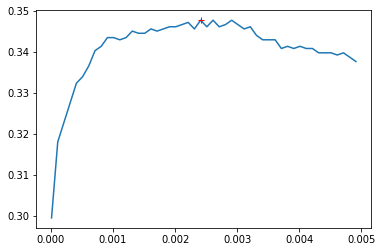

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alpha,accuracy)
plt.plot(alpha[accuracy.index(max(accuracy))],max(accuracy),"r+")
plt.show()

In [ ]:
print(max(accuracy))
alpha[accuracy.index(max(accuracy))]
#best alpha = 0.0016

0.3476417594064653


0.0024100000000000002

## Final Model

In [ ]:
model = MultinomialNB(alpha = 0.0024100000000000002)
model.fit(x_train_tfidf,y_train)
y_pred = model.predict(cv.transform(x_test))

In [ ]:
metrics.accuracy_score(y_test,y_pred) # model's Accuracy

0.3476417594064653

Prediction

In [ ]:
test = pd.read_csv('gdrive/My Drive/Colab Notebooks/NLP_personalityTrait/Twitter_cleaned.csv')
test

,Unnamed: 0,Number of posts,Posts
0,talktodhee,37,excited release song ezhundhu part days ...
1,mari_selvaraj,182,arunmatheswaran iamvasanthravi beemji\ntho...
2,PasupathyMasi,23,beemjicongratulations aryaoffl saktisounder ik...


In [ ]:
test_post=test['Posts']
test_post

0    excited  release  song ezhundhu   part   days ...
1    arunmatheswaran iamvasanthravi     beemji\ntho...
2    beemjicongratulations aryaoffl saktisounder ik...
Name: Posts, dtype: object

In [ ]:
pred_post = model.predict(cv.transform(test_post))
pred_post

array(['ENFP', 'INFP', 'INFP'], dtype='<U4')

In [ ]:
for i in pred_post:
  if i=="ENTJ" or i=="ESTP" or i=="INFP" or i=="ENFJ":
    print("Management Department")
  elif i=="ENTP" or i=="INFJ" or i=="ENFP" or i=="ESFJ":
    print("Marketing Department")
  elif i=="ESTJ":
    print("Treasurer")
  elif i=="INTJ":
    print("Design and Content Department")
  elif i=="ESFP" or i=="ISTP":
    print("Cultural Department")
  elif i=="ISTJ" or i=="ISFJ":
    print("Discipline Department")
  elif i=="ISFP":
    print("Social Media Department")
  elif i=="INTP":
    print("Technical Department")

Marketing Department
Management Department
Management Department
